# Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("traffic1.csv")
print(data.head())

         Date  Views
0  01-01-2020   1554
1  02-01-2020   2820
2  03-01-2020   2970
3  04-01-2020   2111
4  05-01-2020   2393


In [5]:
data.tail()

,Date,Views
227,15-08-2020,2221
228,16-08-2020,2724
229,17-08-2020,3456
230,18-08-2020,3581
231,19-08-2020,2064


In [6]:
data.shape

(232, 2)

In [7]:
data.dtypes

Date     object
Views     int64
dtype: object

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    232 non-null    datetime64[ns]
 1   Views   232 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.8 KB


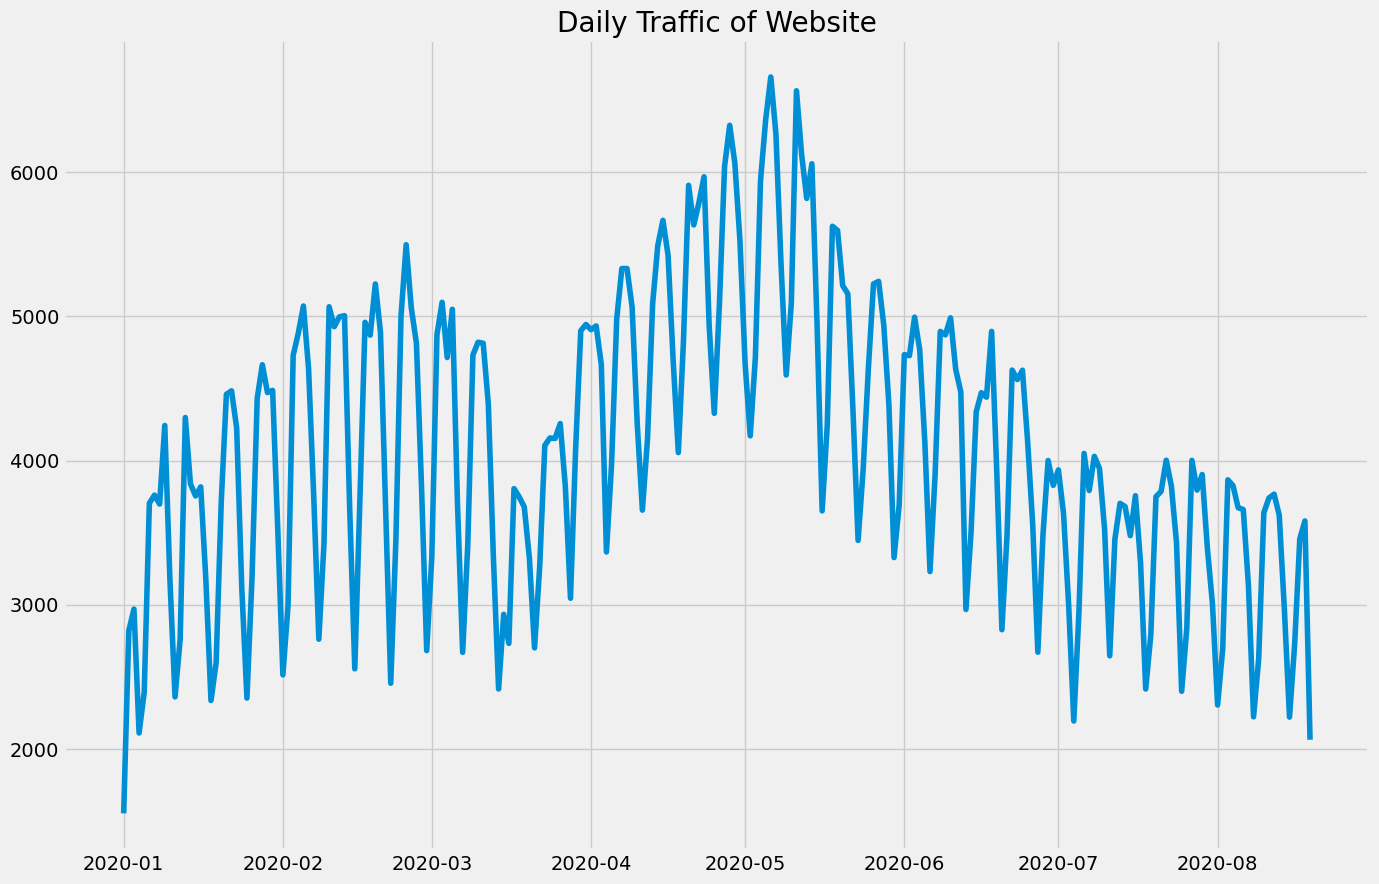

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data['Date'], data['Views'])
plt.title("Daily Traffic of Website")
plt.show()

<Figure size 640x480 with 0 Axes>

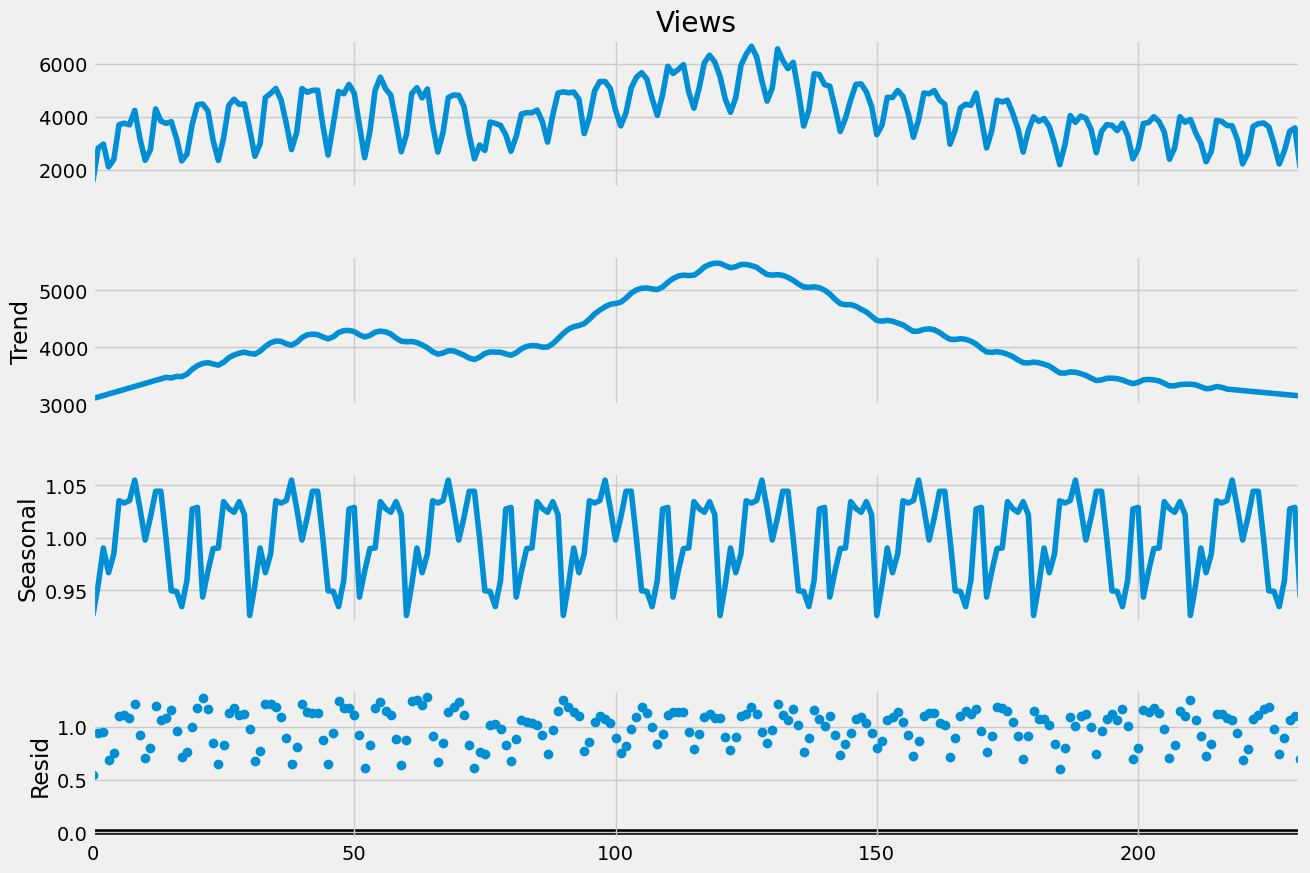

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Views'], model='multiplicative', extrapolate_trend='freq', period=30)
fig= plt.figure()
fig= result.plot()
fig.set_size_inches(15,10)

Insights

Trend Analysis: By examining the trend component, we can identify if website views are generally increasing, decreasing, or stable over time.

Seasonal Patterns: The seasonality component helps detect regular fluctuations—such as higher or lower traffic around specific periods.

Noise or Irregular Patterns: The residual component highlights any unpredictable or irregular fluctuations, which could suggest random events affecting website traffic.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

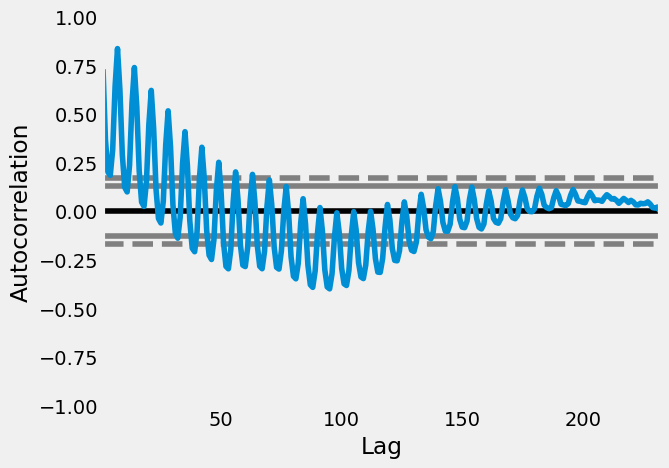

In [16]:
pd.plotting.autocorrelation_plot(data['Views'])

Insights

Lag Relationships: Peaks at certain lags suggest that the website views have patterns repeating at regular intervals.

Model Selection: Strong autocorrelation at lower lags might suggest that ARIMA or seasonal models could be effective for forecasting this data, as it indicates dependency between current and past values.

In [18]:
p,d,q=5,1,2
model = sm.tsa.statespace.SARIMAX(data['Views'], order=(p,d,q), seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  232
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -1619.954
Date:                            Mon, 04 Nov 2024   AIC                           3269.907
Time:                                    12:08:59   BIC                           3320.743
Sample:                                         0   HQIC                          3290.438
                                            - 232                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0968      0.139      0.699      0.485      -0.175       0.368
ar.L2         -0.8163      0.102   

Insights

Seasonality and Trend: This model considers both trend and seasonal cycles, making it well-suited to capture periodic patterns in website traffic data.

Model Fit Evaluation: Reviewing AIC and BIC scores helps assess model fit, where lower values indicate a better fit to the data.

Parameter Significance: The summary shows the significance of each parameter (AR, MA, and seasonal components), helping confirm whether these components meaningfully contribute to the model’s accuracy.

In [20]:
predictions= model.predict(len(data), len(data)+50)
print(predictions)

232    2352.617920
233    2247.783715
234    1946.194579
235    2425.225406
236    3518.328296
237    3214.100334
238    2271.840513
239    2239.285945
240    2169.643933
241    1853.679526
242    2410.681693
243    2941.526031
244    2768.299461
245    2118.744103
246    2063.142480
247    2121.354283
248    1877.984765
249    2320.451857
250    2907.316923
251    2791.672223
252    2087.545324
253    1975.786732
254    1945.684421
255    1493.891949
256    1964.230798
257    2655.461355
258    2600.232846
259    2086.785572
260    1840.676255
261    1802.077271
262    1605.542153
263    2088.207209
264    2520.339615
265    2488.768340
266    1997.000916
267    1610.156396
268    1557.992127
269    1542.064531
270    1969.454773
271    2448.902937
272    2301.455415
273    1915.915932
274    1626.037187
275    1646.565322
276    1516.920424
277    1909.214602
278    2297.203511
279    1978.627872
280    1635.380606
281    1485.635056
282    1499.068910
Name: predicted_mean, dtype: fl

<Axes: >

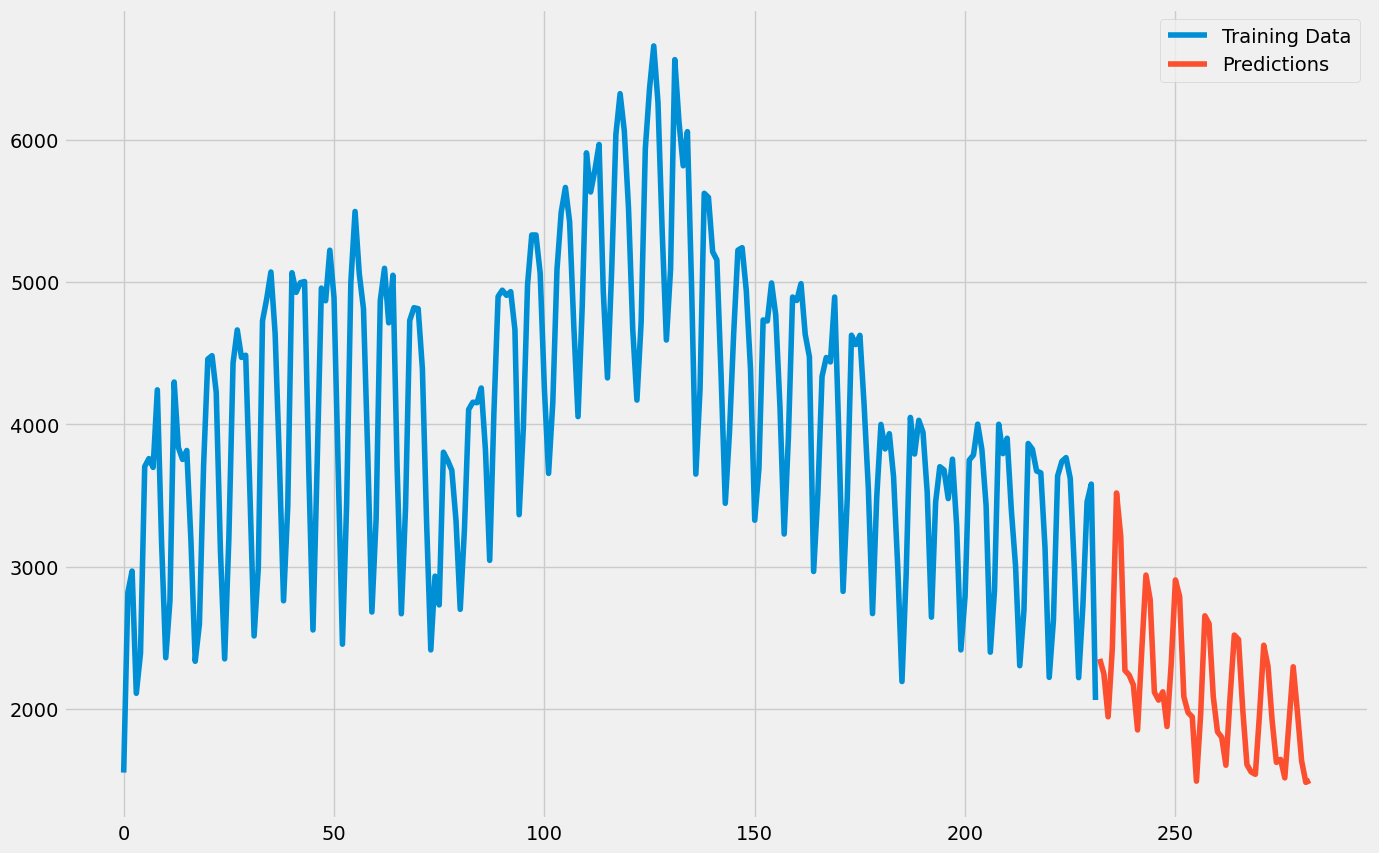

In [22]:
data['Views'].plot(legend=True, label='Training Data', figsize=(15,10))
predictions.plot(legend=True, label="Predictions")

1. Trend Implications
A downward trend suggests that website views are expected to decrease over time. This could be due to seasonal effects, diminishing user engagement, or changes in content or marketing strategies.
Understanding the magnitude and consistency of this downward trend is crucial. If it's gradual, it might indicate a seasonal dip, while a sharp decline could signal a more significant change in user behavior or external factors impacting website traffic.

2. Seasonal Impact
Seasonal factors may be amplifying this downward trend. For example, certain periods (like post-holiday seasons or end-of-year times) typically see reduced website traffic, and SARIMAX would capture this in the seasonal component.
Evaluating past data can help determine if similar declines occurred in previous seasons, reinforcing whether this drop is cyclical or part of a longer-term trend.

3. Actionable Insights
Content and Marketing Strategy: If the trend persists, it might be beneficial to adjust content and marketing strategies to re-engage visitors.
Operational Planning: Knowing that traffic is expected to decline allows teams to allocate resources accordingly, potentially reducing costs or preparing for less server load.

# Summary

In summary, the downward forecasted trend suggests a period of reduced engagement or interest, but understanding the causes (e.g., seasonality, user behavior changes) can inform proactive strategies to address or adapt to this decline.